In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
_ = plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

In [18]:
file = 'summary_results_formated.csv'
df = pd.read_csv(file)

In [19]:
df

,name,public_name,sample,allele,count
0,Y74C9A.3,Y74C9A.3,8-2,N2,1.706341
1,Y74C9A.3,Y74C9A.3,8-2,CB4856,1.759664
2,Y74C9A.2,nlp-40,8-2,N2,9.198244
3,Y74C9A.2,nlp-40,8-2,CB4856,10.557984
4,Y74C9A.4,Y74C9A.4,8-2,N2,2.719481
...,...,...,...,...,...
189403,T23E7.6,T23E7.6,8-5,CB4856,0.000000
189404,F20B4.6,cgt-2,8-5,N2,0.224384
189405,F20B4.6,cgt-2,8-5,CB4856,0.096165
189406,cTel55X.1,cTel55X.1,8-5,N2,1.730963


In [39]:
order = ['mcm-4','Y39G10AR.15','srbc-64','Y39G10AR.16','ugt-31','nekl-1','sydn-1']
order=  ['sydn-1']
to_plot = df[df.public_name.isin(order)]

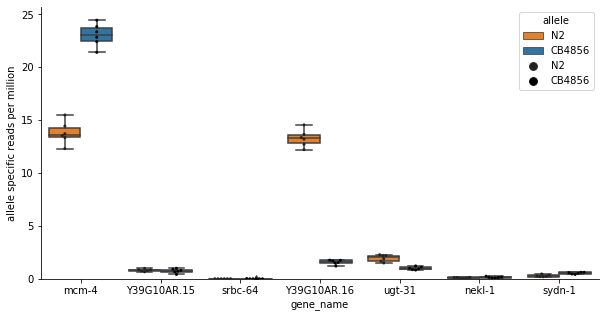

In [37]:
f, axs = plt.subplots(1,figsize=(10,5))
palette ={"N2": sns.color_palette()[1], "CB4856": sns.color_palette()[0]}
_ = sns.swarmplot(x='public_name',y='count',data=to_plot,hue='allele',dodge=True,s=3,color='black',order=order)
_ = sns.boxplot(x='public_name',y='count',data=to_plot,hue='allele',order=order, palette=palette)
_ = plt.ylabel('allele specific reads per million')
_ = plt.xlabel('gene_name')
_ = plt.ylim(0,)
_ = plt.savefig('varying_starting_freq.svg', dpi=300)

In [44]:
to_plot['count']


596       0.346600
597       0.453247
32164     0.204660
32165     0.409320
63732     0.274369
63733     0.612053
95300     0.455401
95301     0.579601
126868    0.246409
126869    0.616022
158436    0.192329
158437    0.512878
Name: count, dtype: float64

# now let's do statistical tests


In [23]:
gene_name_dic = {}
for i in range(len(df)):
    gene_name,public_name = df.iloc[i,0:2]
    if not gene_name in gene_name_dic:
        gene_name_dic[gene_name] = public_name


In [20]:
genes = df.name.unique()

In [24]:
output_file = 'ae_statistics.csv'
with open(output_file,'w') as output_f:
    output_f.write('gene_name,public_name,n2_sum,cb_sum,mannwhitneyu_stat,mannwhitneyu_p\n')
    i=0
    for gene in genes:
        i += 1
#         if i == 10:
#             break
        subset = df[df.name.isin([gene])]
        n2 = subset[subset.allele=='N2']['count']
        n2_sum = sum(n2)
        cb = subset[subset.allele=='CB4856']['count']
        cb_sum = sum(cb)
        try:
            stat, p = mannwhitneyu(n2, cb)
            _ = output_f.write(','.join([gene,gene_name_dic[gene],'{:.2f}'.format(n2_sum),'{:.2f}'.format(cb_sum),'{:.2f}'.format(stat),'{:.10f}'.format(p)]))
            
        except:
            stat, p ='NA','NA'
            _ = output_f.write(','.join([gene,gene_name_dic[gene],'{:.2f}'.format(n2_sum),'{:.2f}'.format(cb_sum),stat,p]))
        _ = output_f.write('\n')
        
        
        
    
    

69

In [8]:
n2 = subset[subset.allele=='N2']['count']
cb = subset[subset.allele=='CB4856']['count']
stat, p = mannwhitneyu(n2, cb)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=5.000, p=0.023



# get the number of differentially expressed genes

In [27]:
file = 'ae_statistics.xlsx'
ae_statistics_df = pd.read_excel(file)

In [28]:
ae_statistics_df.head()

,gene_name,public_name,n2_sum,cb_sum,mannwhitneyu_stat,mannwhitneyu_p
0,Y74C9A.3,Y74C9A.3,9.84,10.28,15.0,0.344460
1,Y74C9A.2,nlp-40,52.27,61.07,0.0,0.002537
2,Y74C9A.4,Y74C9A.4,18.90,22.37,5.0,0.022664
3,Y74C9A.5,sesn-1,0.20,0.03,9.0,0.064536
4,Y74C9A.1,Y74C9A.1,0.03,0.00,15.0,0.202328


# get the number of differentiallly expressed genes in the divergent region

In [21]:
divergent_genes_file = 'Divergent_genes_only.tsv'
divergent_genes_df = pd.read_csv(divergent_genes_file, sep='\t',header=None)
divergent_genes = set(divergent_genes_df[0])

In [22]:
gene_id_file = 'c_elegans.WS230.geneIDs.txt'
gene_ids_df = pd.read_csv(gene_id_file,header=None)
gene_ids_df.head()

,0,1,2
0,WBGene00000001,aap-1,Y110A7A.10
1,WBGene00000002,aat-1,F27C8.1
2,WBGene00000003,aat-2,F07C3.7
3,WBGene00000004,aat-3,F52H2.2
4,WBGene00000005,aat-4,T13A10.10


In [23]:
divergent_genes_name = []
for i in range(len(gene_ids_df)):
    wormbase_id,public_name,gene_name = gene_ids_df.iloc[i,:]
    if wormbase_id in divergent_genes:
        divergent_genes_name.append(gene_name)

In [32]:
len(divergent_genes_name)

4659

In [33]:
ae_statistics_df_divergent = ae_statistics_df[ae_statistics_df.public_name.isin(divergent_genes_name)]
len(ae_statistics_df_divergent)

1905

In [34]:
len(ae_statistics_df)

15784

In [39]:
ae_statistics_df.mannwhitneyu_p.isna().sum()
ae_statistics_df_divergent.mannwhitneyu_p.isna().sum()

3596

293

In [40]:
ae_statistics_df.mannwhitneyu_p.le(0.05).sum()
ae_statistics_df_divergent.mannwhitneyu_p.le(0.05).sum()

3797

665

In [41]:
ae_statistics_df.mannwhitneyu_p.le(0.01).sum()
ae_statistics_df_divergent.mannwhitneyu_p.le(0.01).sum()

2111

429

In [42]:
ae_statistics_df.mannwhitneyu_p.le(0.001).sum()
ae_statistics_df_divergent.mannwhitneyu_p.le(0.001).sum()

0

0